### load_digits()
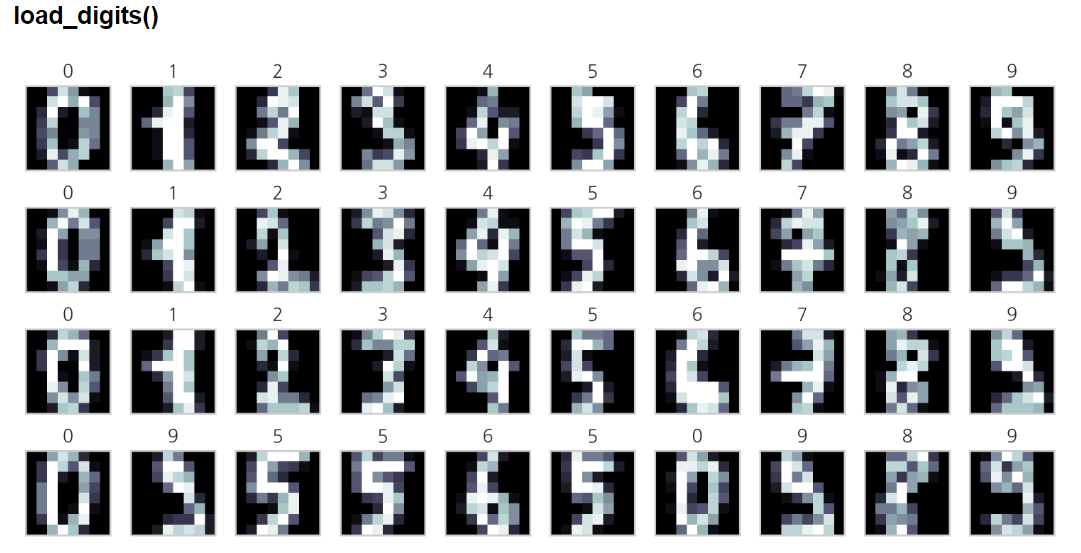

In [90]:
# 각 모듈들 임포트
import numpy as np
# 머신러닝기능을 가진 클래스(객체)를 만들기 위해 필요한 모듈
from sklearn.base import BaseEstimator
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [91]:
# 사이킷런의 내장데이터 셋인 load_digits()를 이용하여 데이터 로딩
digits = load_digits()
print(digits.data)
print("### digits.data.shape:", digits.data.shape)
# 1px당 0~16까지의 명도를 갖고 있으며 그것을 data로 나타냄

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)


In [92]:
k = 0
for i in digits.data[0]:
    print("%2.0f" % i, end='')
    k=k+1
    if k%8==0: print()

 0 0 513 9 1 0 0
 0 013151015 5 0
 0 315 2 011 8 0
 0 412 0 0 8 8 0
 0 5 8 0 0 9 8 0
 0 411 0 112 7 0
 0 214 51012 0 0
 0 0 61310 0 0 0


In [93]:
print("### digits.target.shape:", digits.target.shape)
for i in digits.target:
    print(i, end='')

### digits.target.shape: (1797,)
0123456789012345678901234567890955650989841773510022782012633733466649150952820017632174631391768431405369617544728225795488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217313917684314053696175447282255488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217463139176843140536961754472822579548849089301234567890123456789012345678909556509898417735100227820126337334666491509528200176321746313917684314053696175447282257954884908980123456789012345678901234567890955650989841773510022782012633733466649150952820017632174631391768431405369617544728225795488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217463139176843140536961754472822579548849089801234567890123456789012345678909556509898417735100227820126337334666491509528200176321746313917684314053696175447282257954884908981234567890123456789012345678909556509898417735127820126337334

In [94]:
class MyFakeClassifier(BaseEstimator):  # 파이썬에서 다른 클래스를 상속받아 클래스 생성
    def fit(self, X,y): # 전달값 : self(자바의 this 역할), X_train, y_train
        pass  # 내가만든 머신러닝 알고리즘의 fit는 하는일이 없습니다
    
    def predict(self, X): # 전달값 : self, X_test
        return np.zeros( (len(X), 1), dtype=bool)
        # 리턴값 -> pred, 추후 y_test와 비교되어 정확도를 계산

In [95]:
# digits 번호가 7번이면 True고 이를 astype(int)를 이용해 1로 변환
# 7번이 아니면 False고 0으로 변환
y = (digits.target == 7).astype(int)
# for i in y :
#     print(i, end)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, \
                                                   test_size=0.2)

In [97]:
fakeclf = MyFakeClassifier()  # 객체 생성
fakeclf.fit(X_train, y_train)  # 학습 : fit내용이 없기때문에 아무 실행이 없습니다
fakepred = fakeclf.predict(X_test)  # 예측 : 모두 False(0)로 된 배열이 리턴됩니다
# print(fakepred)

In [98]:
# MyFakeClassifier의 predict 결과는 모두 0
# y_test값은 실제 값이 7일만 1, 나머지는 모두 0
acc = accuracy_score(y_test, fakepred)
print('모든 예측을 0으로 해도 정확도는 :{:.3f}'.format(acc))

모든 예측을 0으로 해도 정확도는 :0.906


### confusion Matrix(오차행렬)

In [99]:
from sklearn.metrics import confusion_matrix

# 앞 절의 예측 결과인 fakepred와 실제 괄과인 y_test의 Confusion Matrix 출력
confusion_matrix(y_test, fakepred)


array([[326,   0],
       [ 34,   0]], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score, precision_score , recall_score
print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


C:\Users\JAVA01\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# y_test값과 pred값을 전달인수로 넣어서 정확도, 오차행렬, 정밀도, 재현율을
# 계산하고 출력하는 함수 제작
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = precision_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(\
                                                               accuracy, precision, recall))

In [106]:
# 원본데이터를 재로딩, 데이터셋(피쳐와 타겟) 분할, 데이터 가공
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.preprocessing import LabelEncoder
# from sklearn import preprocession -> preprocessing.LabelEncoder()
# 데이터 가공에 필요한 함수
def transform_features(df):
    df["Age"].fillna( df["Age"].mean(), inplace=True)
    df["Cabin"].fillna( "N", inplace=True)
    df["Embarked"].fillna( "N", inplace=True)
    df["Fare"].fillna( 0, inplace=True)
    # 필요없는 컬럼 삭제
    df.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)
    # 범주형 데이터 인코딩
    df["Cabin"] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [108]:
titanic_df = pd.read_csv("titanic_train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop('Survived', axis=1)
# 함수를 이용해서 데이터 가공
X_titanic_df = transform_features(X_titanic_df)

# train과 test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,\
                                       y_titanic_df, test_size=0.20, random_state=11)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
get_clf_eval(y_test, pred)
# 정밀도와 재현율은 그 둘의 값 중 하나가 높아지면 하나가 낮아지는 상관관계에 있으므로
# 비슷한 값이 구성되었을 때 높은 성능이라고 평가합니다

오차행렬
[[107  11]
 [ 16  45]]
정확도 : 0.8036, 정밀도 : 0.8036, 재현율 : 0.7377


In [109]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[99 19]
 [18 43]]
정확도 : 0.6935, 정밀도 : 0.6935, 재현율 : 0.7049


In [110]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.7742, 정밀도 : 0.7742, 재현율 : 0.7869


C:\Users\JAVA01\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### predict_proba() 메소드 확인
* predict_prova : 0과 1을 선택하는 기준을 확률로 표시한 배열

In [114]:
pred_proba = lr_clf.predict_proba(X_test)
print('pred_proba array에서 앞 3개만 샘플로 추출 \n', pred_proba[:3])

pred_proba array에서 앞 3개만 샘플로 추출 
 [[0.4616653  0.5383347 ]
 [0.87862763 0.12137237]
 [0.87727002 0.12272998]]


In [115]:
# Binarizer : 임계값 변형 도구
from sklearn.preprocessing import Binarizer

In [116]:
# threshold : Binarizer의 임계값의 기준이 되는 값을 저장한 변수로 활용
# 이 값보다 작으면 0을, 크면 1을 반환합니다
X = [[1,-1, 2],
     [2,0,0],
     [0,1.1,1.2]]
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환

In [119]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
#print(pred_proba_1)
binarizer = Binarizer(threshold=0.5)
binarizer.fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.7742, 정밀도 : 0.7742, 재현율 : 0.7869


In [123]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
#print(pred_proba_1)
binarizer = Binarizer(threshold=0.6)
binarizer.fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8824, 정밀도 : 0.8824, 재현율 : 0.7377
